In [1]:
from utils import split_data
import numpy as np

PATH = "./data/"
splitter = split_data(PATH + "raw.csv", PATH, test_size=0.1,
                          train_size=0.9)
x_train, y_train, x_test, y_test = splitter.split()

/home/markus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from utils import translate

translater = translate()
x_train = translater.translate(x_train)
x_test = translater.translate(x_test)

In [3]:
from utils import standardize

y_train_std, y_test_std = standardize(y_train, y_test)

In [4]:
from modelArchitecture.ResnetRnnDense import ResnetRnnDense

In [5]:
from HydraMethod import HydraMethod

In [6]:
from utils import LRFinder

In [7]:
from utils import result
def T95(model, x, y):
    predict_train = model.predict(x)
    res_train = result(y, predict_train)
    print(np.round(res_train.t95()[0], 4))

In [14]:
from keras.losses import mean_squared_error
one_head_hydra = HydraMethod(ResnetRnnDense(features=32, ResnetDrop=0.2, RnnDrop=0.5), 1)

In [15]:
one_head_hydra.compile(learning_rate=1e-3)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256, epochs=10)

Train on 968793 samples, validate on 110176 samples
Epoch 1/10
968793/968793 [==============================] - 65s 67us/step - loss: 0.1550 - val_loss: 0.1001
Epoch 2/10
968793/968793 [==============================] - 62s 64us/step - loss: 0.1230 - val_loss: 0.0982
Epoch 3/10
968793/968793 [==============================] - 62s 64us/step - loss: 0.1176 - val_loss: 0.1058
Epoch 4/10
968793/968793 [==============================] - 62s 64us/step - loss: 0.1125 - val_loss: 0.1102
Epoch 5/10
968793/968793 [==============================] - 62s 64us/step - loss: 0.1092 - val_loss: 0.0858
Epoch 6/10
968793/968793 [==============================] - 62s 64us/step - loss: 0.1069 - val_loss: 0.0754
Epoch 7/10
968793/968793 [==============================] - 62s 64us/step - loss: 0.1047 - val_loss: 0.0868
Epoch 8/10
968793/968793 [==============================] - 62s 64us/step - loss: 0.1010 - val_loss: 0.0706
Epoch 9/10
968793/968793 [==============================] - 62s 64us/step - loss: 0.

In [16]:
T95(trained_one_head_hydra, one_head_hydra.get_all_representation(x_test), y_test_std)

9.2012


In [17]:
#two_head_hydra = HydraMethod(ResnetRnnDense(), 2);two_head_hydra.compile(loss=mean_squared_error)
two_head_hydra = HydraMethod(ResnetRnnDense(features=32, ResnetDrop=0.2, RnnDrop=0.5), 2)

In [18]:
two_head_hydra.compile(learning_rate=1e-3)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256, epochs=10)

Train on 968793 samples, validate on 110176 samples
Epoch 1/10
968793/968793 [==============================] - 126s 130us/step - loss: 0.1468 - val_loss: 0.0884
Epoch 2/10
968793/968793 [==============================] - 119s 122us/step - loss: 0.1150 - val_loss: 0.1384
Epoch 3/10
968793/968793 [==============================] - 119s 122us/step - loss: 0.1066 - val_loss: 0.1077
Epoch 4/10
968793/968793 [==============================] - 119s 122us/step - loss: 0.1005 - val_loss: 0.0735
Epoch 5/10
968793/968793 [==============================] - 119s 122us/step - loss: 0.0966 - val_loss: 0.0818
Epoch 6/10
968793/968793 [==============================] - 119s 123us/step - loss: 0.0887 - val_loss: 0.0711
Epoch 7/10
968793/968793 [==============================] - 119s 123us/step - loss: 0.0814 - val_loss: 0.0814
Epoch 8/10
968793/968793 [==============================] - 119s 123us/step - loss: 0.0774 - val_loss: 0.0926
Epoch 9/10
968793/968793 [==============================] - 119s 123

In [19]:
T95(trained_two_head_hydra, two_head_hydra.get_all_representation(x_test), y_test_std)

6.2453


In [20]:
#three_head_hydra = HydraMethod(ResnetRnnDense(), 3);three_head_hydra.compile(loss=mean_squared_error)
three_head_hydra = HydraMethod(ResnetRnnDense(features=32, ResnetDrop=0.2, RnnDrop=0.5), 3)

In [21]:
three_head_hydra.compile(learning_rate=1e-3)
trained_three_head_hydra = three_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256, epochs=10)

Train on 968793 samples, validate on 110176 samples
Epoch 1/10
968793/968793 [==============================] - 187s 193us/step - loss: 0.1427 - val_loss: 0.1544
Epoch 2/10
968793/968793 [==============================] - 176s 181us/step - loss: 0.1127 - val_loss: 0.1036
Epoch 3/10
968793/968793 [==============================] - 176s 181us/step - loss: 0.1036 - val_loss: 0.0941
Epoch 4/10
968793/968793 [==============================] - 176s 181us/step - loss: 0.0980 - val_loss: 0.0740
Epoch 5/10
968793/968793 [==============================] - 176s 182us/step - loss: 0.0902 - val_loss: 0.0657
Epoch 6/10
968793/968793 [==============================] - 176s 181us/step - loss: 0.0816 - val_loss: 0.0658
Epoch 7/10
968793/968793 [==============================] - 176s 182us/step - loss: 0.0770 - val_loss: 0.0616
Epoch 8/10
968793/968793 [==============================] - 176s 182us/step - loss: 0.0732 - val_loss: 0.0644
Epoch 9/10
968793/968793 [==============================] - 176s 182

In [22]:
T95(trained_three_head_hydra, three_head_hydra.get_all_representation(x_test), y_test_std)

6.3752


In [23]:
#four_head_hydra = HydraMethod(ResnetRnnDense(), 4);four_head_hydra.compile(loss=mean_squared_error)
four_head_hydra = HydraMethod(ResnetRnnDense(features=32, ResnetDrop=0.2, RnnDrop=0.5), 4)

In [24]:
four_head_hydra.compile(learning_rate=5e-4)
trained_four_head_hydra = four_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256, epochs=10)

Train on 968793 samples, validate on 110176 samples
Epoch 1/10
968793/968793 [==============================] - 252s 260us/step - loss: 0.1374 - val_loss: 0.1126
Epoch 2/10
968793/968793 [==============================] - 237s 244us/step - loss: 0.1020 - val_loss: 0.0848
Epoch 3/10
968793/968793 [==============================] - 236s 244us/step - loss: 0.0943 - val_loss: 0.0771
Epoch 4/10
968793/968793 [==============================] - 236s 244us/step - loss: 0.0883 - val_loss: 0.0873
Epoch 5/10
968793/968793 [==============================] - 236s 244us/step - loss: 0.0788 - val_loss: 0.0604
Epoch 6/10
968793/968793 [==============================] - 237s 244us/step - loss: 0.0731 - val_loss: 0.0672
Epoch 7/10
968793/968793 [==============================] - 236s 244us/step - loss: 0.0688 - val_loss: 0.0672
Epoch 8/10
968793/968793 [==============================] - 236s 244us/step - loss: 0.0666 - val_loss: 0.0596
Epoch 9/10
968793/968793 [==============================] - 236s 244

In [25]:
T95(trained_four_head_hydra, four_head_hydra.get_all_representation(x_test), y_test_std)

5.8559


In [26]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [27]:
#four_model = four_head_hydra.get_model()
four_model_loss = trained_four_head_hydra.history.history["loss"]
four_model_val_loss = trained_four_head_hydra.history.history["val_loss"]

#three_model = trained_three_head_hydra.get_model()
three_model_loss = trained_three_head_hydra.history.history["loss"]
three_model_val_loss = trained_three_head_hydra.history.history["val_loss"]

#two_model = two_head_hydra.get_model()
two_model_loss = trained_two_head_hydra.history.history["loss"]
two_model_val_loss = trained_two_head_hydra.history.history["val_loss"]

#one_model = one_head_hydra.get_model()
one_model_loss = trained_one_head_hydra.history.history["loss"]
one_model_val_loss = trained_one_head_hydra.history.history["val_loss"]

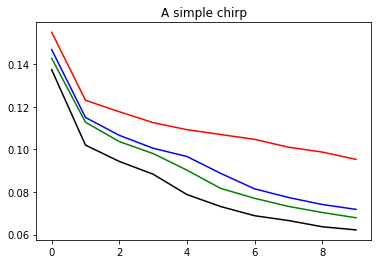

In [28]:
plt.plot(one_model_loss, color="red")
plt.plot(two_model_loss, color="blue")
plt.plot(three_model_loss, color="green")
plt.plot(four_model_loss, color="black")
plt.title('A simple chirp')
plt.show()

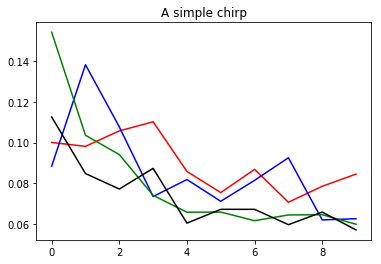

In [29]:
plt.plot(one_model_val_loss, color="red")
plt.plot(two_model_val_loss, color="blue")
plt.plot(three_model_val_loss, color="green")
plt.plot(four_model_val_loss, color="black")
plt.title('A simple chirp')
plt.show()